In [3]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
# import soundfile as sf
from scipy.fft import rfft,rfftfreq
import librosa
import librosa.display
import IPython.display as ipd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')

In [4]:
def mfcc_feature_extractor(audio,sampleRate):
    mfccsFeatures = librosa.feature.mfcc(y=audio, sr=sampleRate, n_mfcc=40)
    mfccsScaledFeatures = np.mean(mfccsFeatures.T,axis=0)
    
    return mfccsScaledFeatures

In [5]:
def contrast_feature_extractor(audio,sampleRate):
    stft = np.abs(librosa.stft(audio))
    contrast = librosa.feature.spectral_contrast(S=stft, sr=sampleRate) 
    contrastScaled = np.mean(contrast.T,axis=0)
    
    return contrastScaled

In [6]:
def tonnetz_feature_extractor(audio,sampleRate):
    tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(audio), sr=sampleRate)
    tonnetzScaled = np.mean(tonnetz.T,axis=0)
    
    return tonnetzScaled

In [7]:
def chroma_feature_extractor(audio,sampleRate):
    stft = np.abs(librosa.stft(audio))
    chroma = librosa.feature.chroma_stft(S=stft,sr=sampleRate)
    chromaScaled = np.mean(chroma.T,axis=0)
    
    return chromaScaled

In [8]:
def features_extractor(file):
    features=[]
    audio, sampleRate = librosa.load(file, res_type='kaiser_fast') 
    mfcc=mfcc_feature_extractor(audio,sampleRate)
    contrast = contrast_feature_extractor(audio,sampleRate)
    tonnetz = tonnetz_feature_extractor(audio,sampleRate)
    chroma = chroma_feature_extractor(audio,sampleRate)

    features.append([mfcc,contrast,tonnetz,chroma])
    features[0] = np.concatenate((features[0][0],features[0][1],features[0][2],features[0][3]))
    return features

In [9]:
def add_features(extractedFeatures,dirPath,label):
    for file in os.listdir(dirPath):
        filePath = dirPath+'/'+file
        finalClassLabels=label
        audio, sampleRate = librosa.load(filePath, res_type='kaiser_fast') 
        mfcc=mfcc_feature_extractor(audio,sampleRate)
        contrast = contrast_feature_extractor(audio,sampleRate)
        tonnetz = tonnetz_feature_extractor(audio,sampleRate)
        chroma = chroma_feature_extractor(audio,sampleRate)
        extractedFeatures.append([mfcc,contrast,tonnetz,chroma,finalClassLabels])

In [10]:
dict = {"in group":
        ["C:/Users/EXTRA/DSP_Task3/backend/files/Anwar",
         "C:/Users/EXTRA/DSP_Task3/backend/files/Aya",
         "C:/Users/EXTRA/DSP_Task3/backend/files/Ehab",
         "C:/Users/EXTRA/DSP_Task3/backend/files/Zeyad",
         "C:/Users/EXTRA/DSP_Task3/processing/anwar",
         "C:/Users/EXTRA/DSP_Task3/processing/aya",
         "C:/Users/EXTRA/DSP_Task3/processing/ehab",
         "C:/Users/EXTRA/DSP_Task3/processing/zeyad",
         "C:/Users/EXTRA/DSP_Task3/processing/words/Anwar",
         "C:/Users/EXTRA/DSP_Task3/processing/words/Aya",
         "C:/Users/EXTRA/DSP_Task3/processing/words/Ehab",
         "C:/Users/EXTRA/DSP_Task3/processing/words/Zeyad"],
                "out of group":
                    ["C:/Users/EXTRA/DSP_Task3/backend/outGroup"]}

    


In [11]:
extractedFeatures = []
for i in dict.keys():
    for x in dict[i]:
        add_features(extractedFeatures,x,i)

In [12]:
data=pd.DataFrame(extractedFeatures,columns=['mfcc','contrast','tonnetz','chroma','class'])
print(data.shape)
data.head()

(2247, 5)


,mfcc,contrast,tonnetz,chroma,class
0,"[-506.52463, 61.64891, 8.294457, 6.1529727, 16...","[18.225099789410645, 14.073347582034515, 14.92...","[-0.026156166403453775, -0.007522828056776607,...","[0.7895138, 0.7891665, 0.7331944, 0.69265306, ...",in group
1,"[-484.83054, 57.63201, 19.381887, 17.619091, 1...","[20.11971653181864, 14.4055109778802, 15.14931...","[0.020898464482939905, 0.02311273234743904, 0....","[0.7711498, 0.77708644, 0.7428681, 0.6990656, ...",in group
2,"[-375.71805, 95.867195, -0.665796, 31.796244, ...","[18.940401074917414, 15.716624572258736, 17.18...","[0.0030600953263598307, 0.004340534464086048, ...","[0.62990934, 0.66626626, 0.70043945, 0.7260682...",in group
3,"[-351.94073, 53.247982, 12.9672785, 10.35929, ...","[18.990867307267536, 14.260342060954631, 16.18...","[-0.013442975463150214, -0.03099029914648438, ...","[0.7548545, 0.85651636, 0.81929094, 0.6672034,...",in group
4,"[-442.27194, 81.52423, 17.646692, 13.475121, 1...","[20.260033821862628, 13.37880827112114, 15.661...","[-0.021241162685261376, -0.021280018761884012,...","[0.665574, 0.78218377, 0.7599841, 0.68303883, ...",in group


In [13]:
features=data.iloc[:,0:-1]
target=data['class']
features.head()

,mfcc,contrast,tonnetz,chroma
0,"[-506.52463, 61.64891, 8.294457, 6.1529727, 16...","[18.225099789410645, 14.073347582034515, 14.92...","[-0.026156166403453775, -0.007522828056776607,...","[0.7895138, 0.7891665, 0.7331944, 0.69265306, ..."
1,"[-484.83054, 57.63201, 19.381887, 17.619091, 1...","[20.11971653181864, 14.4055109778802, 15.14931...","[0.020898464482939905, 0.02311273234743904, 0....","[0.7711498, 0.77708644, 0.7428681, 0.6990656, ..."
2,"[-375.71805, 95.867195, -0.665796, 31.796244, ...","[18.940401074917414, 15.716624572258736, 17.18...","[0.0030600953263598307, 0.004340534464086048, ...","[0.62990934, 0.66626626, 0.70043945, 0.7260682..."
3,"[-351.94073, 53.247982, 12.9672785, 10.35929, ...","[18.990867307267536, 14.260342060954631, 16.18...","[-0.013442975463150214, -0.03099029914648438, ...","[0.7548545, 0.85651636, 0.81929094, 0.6672034,..."
4,"[-442.27194, 81.52423, 17.646692, 13.475121, 1...","[20.260033821862628, 13.37880827112114, 15.661...","[-0.021241162685261376, -0.021280018761884012,...","[0.665574, 0.78218377, 0.7599841, 0.68303883, ..."


In [14]:
features = features.values.tolist()
for i in range(len(features)):
    features[i] = np.concatenate((features[i][0],features[i][1],features[i][2],features[i][3]))

In [15]:
encoder = LabelEncoder()
target = encoder.fit_transform(target)

In [16]:
xTrain, xTest, yTrain, yTest = train_test_split(features, target, test_size=0.25, random_state=0)

In [17]:
classifier= SVC(kernel='linear', decision_function_shape="ovo")
classifier.fit(xTrain,yTrain)

SVC(decision_function_shape='ovo', kernel='linear')

In [18]:
preds = classifier.predict(xTest)

In [19]:
def prediction(pred):
    if pred==0:
        print("in group")
    elif pred==1:
        print("out of group")


In [20]:
print(classification_report(yTest,preds))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       290
           1       0.93      0.94      0.93       272

    accuracy                           0.94       562
   macro avg       0.94      0.94      0.94       562
weighted avg       0.94      0.94      0.94       562



In [21]:
testFeatures = features_extractor("C:/Users/EXTRA/DSP_Task3/processing/words/Aya/voice01100741.wav")
pred = classifier.predict(testFeatures)
prediction(pred)


in group


In [22]:
pickle_out = open("ingroup_model.pkl", "wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [23]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(SVC(kernel='linear', decision_function_shape="ovo"),
          k_features=3,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [24]:
features1 = pd.DataFrame(features)

In [25]:
sfs.fit(features1, target)
sfs.k_feature_names_

(4, 11, 45)

In [26]:
# xTrain = pd.DataFrame(xTrain)
# yTrain = pd.DataFrame(yTrain)
for i in range(len(xTrain)):
    xTrain[i] = xTrain[i].tolist()

In [27]:
xTrain = np.array(xTrain)

In [28]:
xTrain

array([[-2.66738739e+02,  1.03663437e+02,  4.57347250e+00, ...,
         6.65094912e-01,  6.49608910e-01,  6.42543912e-01],
       [-4.48730499e+02,  1.28073349e+02,  5.41881466e+00, ...,
         5.64448655e-01,  4.81527716e-01,  4.70946014e-01],
       [-1.32712402e+02,  1.24452629e+02, -5.78597565e+01, ...,
         8.64456952e-01,  7.29332209e-01,  5.85895121e-01],
       ...,
       [-4.08519897e+02,  1.33835327e+02,  1.11045971e+01, ...,
         6.23941481e-01,  5.90551853e-01,  5.97101927e-01],
       [-3.74894928e+02,  1.10480606e+02,  1.85306492e+01, ...,
         5.01949251e-01,  5.00471771e-01,  4.95753914e-01],
       [-4.74773224e+02,  9.46302719e+01,  9.27752554e-01, ...,
         7.55193293e-01,  6.06650174e-01,  5.73853016e-01]])

In [29]:
xtrainNew = []
for i in xTrain:
    xtrainNew.append([i[4],i[46]])
xtrainNew = np.array(xtrainNew)

In [32]:
# # import numpy as np
# # import matplotlib.pyplot as plt
# # from sklearn import svm, datasets

# # import some data to play with
# # iris = datasets.load_iris()
X = xtrainNew  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = yTrain

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = SVC(kernel='linear', C=C).fit(X, y)
# rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
# poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
# lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
# titles = ['SVC with linear kernel',
#           'LinearSVC (linear kernel)',
#           'SVC with RBF kernel',
#           'SVC with polynomial (degree 3) kernel']


# for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
# plt.subplot(2, 2, i + 1)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

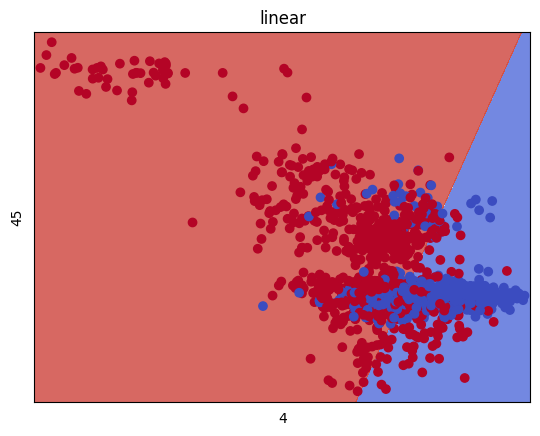

In [46]:
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=plt.cm.coolwarm)

plt.plot([40], [40], color="green", alpha=1)  # plotting single point

plt.xlabel('4')
plt.ylabel('45')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("linear")

plt.show()